In [1]:
from matplotlib import pyplot as plt
import cv2
import numpy as np
import time

In [2]:
from ppadb.client import Client as AdbClient
# Default is "127.0.0.1" and 5037
adb = AdbClient(host="127.0.0.1", port=5037)
devices = adb.devices()

device = devices[0]

17 5 5


Text(0.5, 1.0, 'my picture')

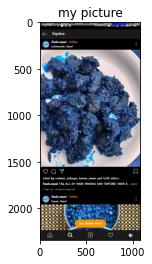

In [12]:
current_active_screen = device.screencap()
with open(f"./image.png", "wb") as image_file:
    image_file.write(current_active_screen)

image= cv2.imread(f"image.png")
# image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

pixel_x, pixel_y = 742, 498
r, g, b = image[pixel_x, pixel_y][2], image[pixel_x, pixel_y][1], image[pixel_x][pixel_y][0]

print(r, g, b)

plt.imshow(image)
plt.title('my picture')
